# ANN 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# importing dataset

In [21]:
dataset = pd.read_csv('D:\worked programs\ANN\Churn_Modelling.csv')

In [23]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [22]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

# Create dummy variables

In [3]:
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

# Concatenate the Data Frames

In [4]:
X=pd.concat([X,geography,gender],axis=1)

# Drop Unnecessary columns

In [5]:
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# now we are creating ANN for that now we are Importing the Keras libraries and packages

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

Using TensorFlow backend.


# Initialising the ANN

In [10]:
classifier = Sequential()

# Adding the input layer and the first hidden layer,second hidden layer and output layer

In [11]:
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu',input_dim = 11))
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu'))
classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'sigmoid'))

D:\python\envs\AsusEnv\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="he_uniform")`
  """Entry point for launching an IPython kernel.
D:\python\envs\AsusEnv\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="he_uniform")`
  
D:\python\envs\AsusEnv\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until


# Compiling the ANN

In [12]:
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set

In [13]:
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)

D:\python\envs\AsusEnv\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 9s 2ms/step - loss: 0.5176 - accuracy: 0.7912 - val_loss: 0.4906 - val_accuracy: 0.7955
Epoch 2/100
5359/5359 [==============================] - 7s 1ms/step - loss: 0.4775 - accuracy: 0.7962 - val_loss: 0.4713 - val_accuracy: 0.7955
Epoch 3/100
5359/5359 [==============================] - 7s 1ms/step - loss: 0.4615 - accuracy: 0.7962 - val_loss: 0.4603 - val_accuracy: 0.7955
Epoch 4/100
5359/5359 [==============================] - 7s 1ms/step - loss: 0.4514 - accuracy: 0.7974 - val_loss: 0.4529 - val_accuracy: 0.7955
Epoch 5/100
5359/5359 [==============================] - 7s 1ms/step - loss: 0.4430 - accuracy: 0.7998 - val_loss: 0.4481 - val_accuracy: 0.7944
Epoch 6/100
5359/5359 [==============================] - 7s 1ms/step - loss: 0.4367 - accuracy: 0.8016 - val_loss: 0.4446 - val_accuracy: 0.7970
Epoch 7/100
5359/5359 [==============================] - 7s 1ms/step - loss: 0.431

# history of loss

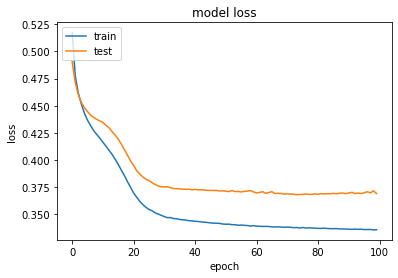

In [15]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# prediction for the test

In [16]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# now creating a confusion matrix

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# now finally creating the accuracy

In [18]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [19]:
cm

array([[1533,   62],
       [ 214,  191]], dtype=int64)

In [20]:
score

0.862